<h1>Logistic regression</h1>

Let’s now talk about the classification problem. This is just like the regression
problem, except that the values $y$ we now want to predict take on only
a small number of discrete values. For now, we will focus on the binary
classification problem in which y can take on only two values, $0$ and $1$.
(Most of what we say here will also generalize to the multiple-class case.)
For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a piece of email, and y may be $1$ if it is a piece
of spam mail, and 0 otherwise. $0$ is also called the negative class, and $1$ the positive class, and they are sometimes also denoted by the symbols “$-$” and “$+$.” Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the label for the training example.


We could approach the classification problem ignoring the fact that $y$ is
discrete-valued, and use our old linear regression algorithm to try to predict
$y$ given $x$. However, it is easy to construct examples where this method
performs very poorly. Intuitively, it also doesn’t make sense for $h_{\theta}(x)$ to take
values larger than $1$ or smaller than $0$ when we know that $y\in{0, 1}$.
To fix this, let’s change the form for our hypotheses $h_{\theta}(x)$. We will choose

$$h_{\theta} = g(\theta^Tx) = \frac{1}{1+\exp{(-\theta^Tx)}}$$

where

$$g(z) = \frac{1}{1+\exp{(-z)}}$$

and $z = \theta^Tx$. $g$ is called the logistic function or the sigmoid function. Here is a plot
showing $g(z)$:


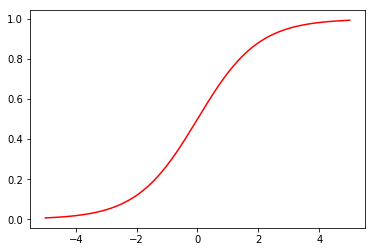

In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 200)

sigmoid = tf.nn.sigmoid(x)

with tf.Session() as sess:
    y_sigmoid = sess.run(sigmoid)

plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.show()

Notice that $g(z)$ tends towards $1$ as $z\rightarrow \infty$, and $g(z)$ tends towards $0$ as
$z\rightarrow -\infty$. Moreover, $g(z)$, and hence also $h(x)$, is always bounded between
$0$ and $1$. As before, we are keeping the convention of letting $x_0 = 1$, so that we can write $\theta_0 + \sum_{i=1}^{m}\theta_ix_i = \theta^Tx$.  Before moving on, here’s a useful property of the derivative of the sigmoid function, which we write as $g'$:

\begin{align*}
g'(z) &= \frac{d}{dz}\frac{1}{1+\exp{(-z)}}\\
&= \frac{1}{(1+\exp{(-z))^2}}\exp(-z)\\
&= \frac{1}{1+\exp(-z)} . \big(1-\frac{1}{1+\exp(-z)}\big)\\
&= g(z).(1-g(z))
\end{align*}

So, given the logistic regression model, how do we fit $\theta$ for it?  Following
how we saw least squares regression could be derived as the maximum likelihood
estimator under a set of assumptions, let’s endow our classification
model with a set of probabilistic assumptions, and then fit the parameters
via maximum likelihood. Let us assume

\begin{align*}
P(y=1|x;\theta) &= h_{\theta}(x)\\
P(y=0|x;\theta) &= 1 - h_{\theta}(x)
\end{align*}

Note that this can be written more compactly as

$$P(y|x;\theta) = (h_{\theta}(x))^y \;(1 - h_{\theta}(x))^{1-y}$$

Assuming that the m training examples were generated independently, we
can then write down the likelihood of the parameters as

\begin{align*}
L(\theta) &= p(\hat{y}|X;\theta)\\
&= \prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)\\
&= \prod_{i=1}^m (h_{\theta}(x^{(i)}))^{y^{(i)}} \;(1 - h_{\theta}(x^{(i)}))^{1-y^{(i)}}
\end{align*}

As before, it will be easier to maximize the log likelihood:
\begin{align*}
\ell(\theta) &= log\;L(\theta)\\
&= \sum_{i=1}^m {y^{(i)}}log\;(h_{\theta}(x^{(i)})) + (1-y^{(i)})\;log\;(1 - h_{\theta}(x^{(i)}))
\end{align*}

How do we maximize the likelihood? Similar to our derivation in the case
of linear regression, we can use gradient ascent. Written in vectorial notation,
our updates will therefore be given by $\theta = \theta + \alpha\nabla_{\theta}\ell(\theta)$. (Note the positive
rather than negative sign in the update formula, since we’re maximizing,
rather than minimizing, a function now.) Let’s start by working with just
one training example $(x, y)$, and take derivatives to derive the stochastic
gradient ascent rule:

\begin{align*}
\frac{\partial}{\partial\theta_j}\ell(\theta) &= \frac{\partial}{\partial\theta} \big[{y}\;log\;(h_{\theta}(x)) + (1-y)\;log\;(1 - h_{\theta}(x))\big]\\
&= \big[ {y}\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{(1 - g(\theta^Tx))} \big]\;\frac{\partial}{\partial\theta} g(\theta^Tx)\\
&= \big[ {y}\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{(1 - g(\theta^Tx))} \big]\; (g(\theta^Tx).(1-g(\theta^Tx)))\frac{\partial}{\partial\theta}\theta^T x \\
&= \big[ {y}(1 - g(\theta^Tx)) - (1-y)g(\theta^Tx) \big]\;x_j\\
&= \big[y - yg(\theta^Tx) - g(\theta^Tx) + yg(\theta^Tx) \big]\;x_j\\
&= \big[y - h_{\theta}(x)\big]\;x_j
\end{align*}

Using the above equation, we derive the gradient descent algorithm for logistic regression:

\begin{align}
repeat \{\\
&\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_j\\
\}
\end{align}

#### Regularized logistic regression

\begin{align*}
min_{\theta}\;J(\theta)= \big[-\frac{1}{m} \sum_{i=1}^m {y^{(i)}}log\;(h_{\theta}(x^{(i)})) + (1-y^{(i)})\;log\;(1 - h_{\theta}(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^m \theta_j^2
\end{align*}

\begin{align}
repeat \{\\
&\theta_0 = \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_0\\
&\theta_j = \theta_j - \alpha\big[\frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_j-\frac{\lambda}{m}\theta_j\big]\\
\}
\end{align}

### Implementation

In [27]:
data = pd.read_csv('../exercise/ex2/data/ex2data1.txt', sep=",", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [28]:
def plotData(data):
    pos = data[data[2] == 1]
    neg = data[data[2] == 0]
    
    plt.plot(pos[0], pos[1], 'k+', markeredgewidth=2, markersize=7)
    plt.plot(neg[0], neg[1], 'ko', markerfacecolor='r', markersize=7)
    

def plotDecisionBoundary(theta, X, y):
    plotData(X[:, 1:3], y)
 
    if X.shape[1] <= 3:
        plot_x = r_[X[:,2].min()-2,  X[:,2].max()+2]
        plot_y = (-1./theta[2]) * (theta[1]*plot_x + theta[0])
 
        plt.plot(plot_x, plot_y)
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.axis([30, 100, 30, 100])
    else:
        pass

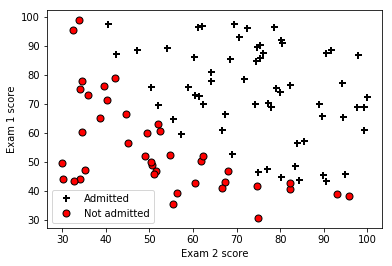

In [29]:
plotData(data)
plt.ylabel('Exam 1 score')
plt.xlabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
plt.show()    